# 資料來源

https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv

資料來自於datacamp的資料分析師認證考試。

分析目標是協助公司進行新產品行銷方式的決策，根據3種行銷方式在6週中所獲得的資料，來比較不同行銷方式的收益表現。


# 背景說明

## 公司背景

About Pens and Printers

Pens and Printers was founded in 1984 and provides high quality office products to large
organizations. We are a trusted provider of everything from pens and notebooks to desk
chairs and monitors. We don’t produce our own products but sell those made by other
companies.
We have built long lasting relationships with our customers and they trust us to provide them
with the best products for them. As the way in which consumers buy products is changing,
our sales tactics have to change too. Launching a new product line is expensive and we need
to make sure we are using the best techniques to sell the new product effectively. The best
approach may vary for each new product so we need to learn quickly what works and what
doesn’t.

## 產品行銷方式

New Product Sales Methods

Six weeks ago we launched a new line of office stationery. Despite the world becoming
increasingly digital, there is still demand for notebooks, pens and sticky notes.
Our focus has been on selling products to enable our customers to be more creative, focused
on tools for brainstorming. We have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two.

**Email**: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.

**Call**: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.

**Email and call**: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer.

# 資料分析

## 資料導入

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## 資料清理

In [7]:
df.sales_method.value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [8]:
df.sales_method = df.sales_method.replace('em + call', 'Email + Call')
df.sales_method = df.sales_method.replace('email', 'Email')
df.sales_method.value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [9]:
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [11]:
# 檢查id是否有重覆值
duplicates = df.duplicated(subset = 'customer_id', keep = False)
duplicates.sum()

0

In [13]:
df['revenue'].describe()

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64

In [14]:
df['revenue'] = round(df['revenue'].fillna(0),2)

In [18]:
df['years_as_customer'].describe()

count    15000.000000
mean         4.965933
std          5.044952
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: years_as_customer, dtype: float64

In [19]:
df['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
47       1
63       1
Name: years_as_customer, dtype: int64

In [20]:
df.loc[df['years_as_customer'] > 38, 'years_as_customer'] = 38

In [21]:
df['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       7
Name: years_as_customer, dtype: int64

<AxesSubplot:>

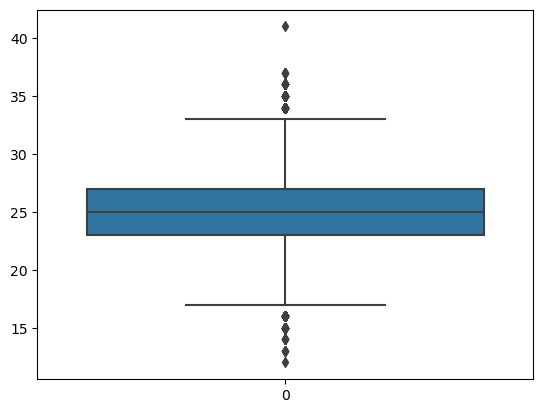

In [22]:
sns.boxplot(df['nb_site_visits'])

In [23]:
df['nb_site_visits'].describe()

count    15000.000000
mean        24.990867
std          3.500914
min         12.000000
25%         23.000000
50%         25.000000
75%         27.000000
max         41.000000
Name: nb_site_visits, dtype: float64

In [24]:
df.state.value_counts()

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

## 結果分析

### How many customers were there for each approach?

In [25]:
df.groupby('sales_method')['customer_id'].nunique()

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64

### What does the spread of the revenue look like overall? And for each method?

Text(0.5, 1.0, 'The spread of the revenue overall')

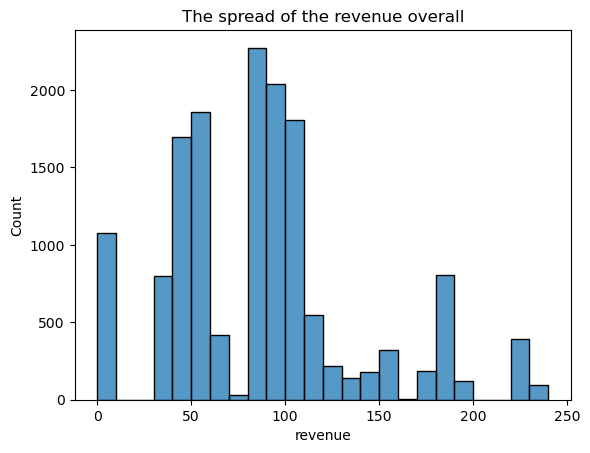

In [40]:
bins = np.arange(0, 250, 10)
g = sns.histplot(df['revenue'], bins=bins)
g.set_title('The spread of the revenue overall')

In [29]:
df['revenue'].describe()

count    15000.000000
mean        87.209201
std         51.725970
min          0.000000
25%         50.600000
50%         87.575000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64

Text(0.5, 1.0, 'The spread of revenue between sales methods')

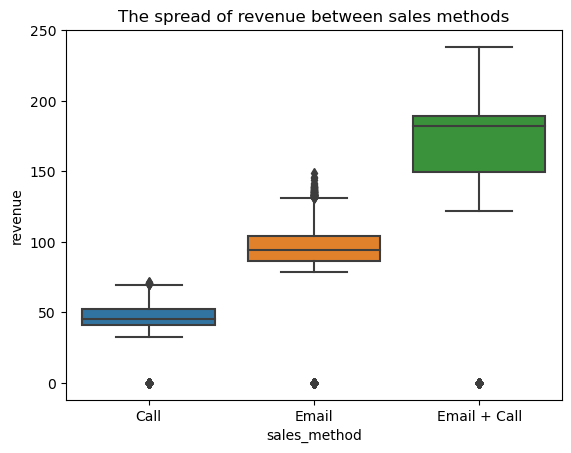

In [30]:
g= sns.boxplot(y='revenue',data=df, x='sales_method', order=['Call', 'Email', 'Email + Call'])
g.set_title('The spread of revenue between sales methods')

In [33]:
df.groupby(['sales_method'])['nb_site_visits'].describe()

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4962.0,24.423821,3.599864,12.0,22.0,24.0,27.0,41.0
Email,7466.0,24.754353,3.281552,13.0,23.0,25.0,27.0,37.0
Email + Call,2572.0,26.771384,3.357916,14.0,25.0,27.0,29.0,37.0


### Was there any difference in revenue over time for each of the methods?

Text(0.5, 1.0, 'Revenue over time between sales methods')

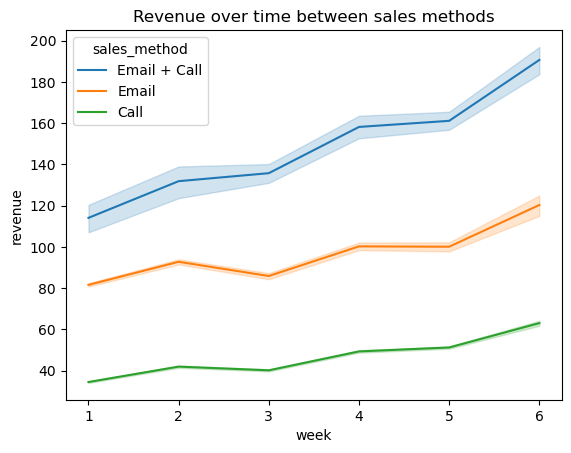

In [34]:
g = sns.lineplot(data=df, x='week', y='revenue',hue='sales_method', hue_order=['Email + Call', 'Email','Call' ])
g.set_title('Revenue over time between sales methods')

### Based on the data, which method would you recommend we continue to use?

In [36]:
df.groupby(['sales_method'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4962.0,45.861243,12.290939,0.0,41.0900,45.470,52.590,71.36
Email,7466.0,90.050607,27.457181,0.0,86.5000,94.275,104.460,148.97
Email + Call,2572.0,158.731217,68.470245,0.0,149.8225,182.135,189.535,238.32


In [37]:
df_ec = df[df['sales_method'] == 'Email + Call']
df_ec['revenue'].describe()

# revenue medium $182

count    2572.000000
mean      158.731217
std        68.470245
min         0.000000
25%       149.822500
50%       182.135000
75%       189.535000
max       238.320000
Name: revenue, dtype: float64